### <font color='#cb4154'> CS6375: Machine Learning (Spring '19) </font>
_**Instructor**: Gautam Kunapuli_ <br>
_**Due**: In class, **February 27 (Wednesday)**_

---

# **_Homework 2_**

The report component of this assignment is the **hard copy** of this homework, along with your answers to questions, and is **due at the start of class on <font color='#cb4154'>Wednesday, February 27, 2019</font>**.

The **electronic version** of this homework **must be uploaded on eLearning by <font color='#cb4154'>12:59pm Central Standard Time, Wednesday, February 27, 2019</font>**. All deadlines are hard and without exceptions unless permission was obtained from the instructor **in advance**. 

You may work in groups to discuss the problems and work through solutions together. However, you must **write up your solutions on your own**, without copying another student's work or letting another student copy your work. In your solution for each problem, you must write down the names of your partner (if any); this will not affect your grade. 

---

# 1. <font color='#cb4154'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [1]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(42)
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

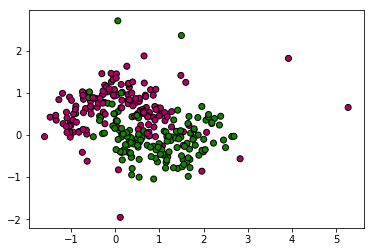

In [3]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

C        	Training Error	Validation Error
0.001000	192.000000	48.000000
0.010000	192.000000	48.000000
0.100000	124.000000	30.000000
1.000000	119.000000	26.000000
10.000000	115.000000	28.000000
100.000000	114.000000	28.000000
1000.000000	114.000000	27.000000
10000.000000	114.000000	29.000000
100000.000000	112.000000	29.000000
Minimum validation error:  26.0  at C_best =  1.0
As C increases the error decreases significantly till C=1, after which there is not much change.
As C increases the complexity of the classifier increases and the margin of separation of support vectors decreases.
Accuracy of SVM model with C_best is:  0.65


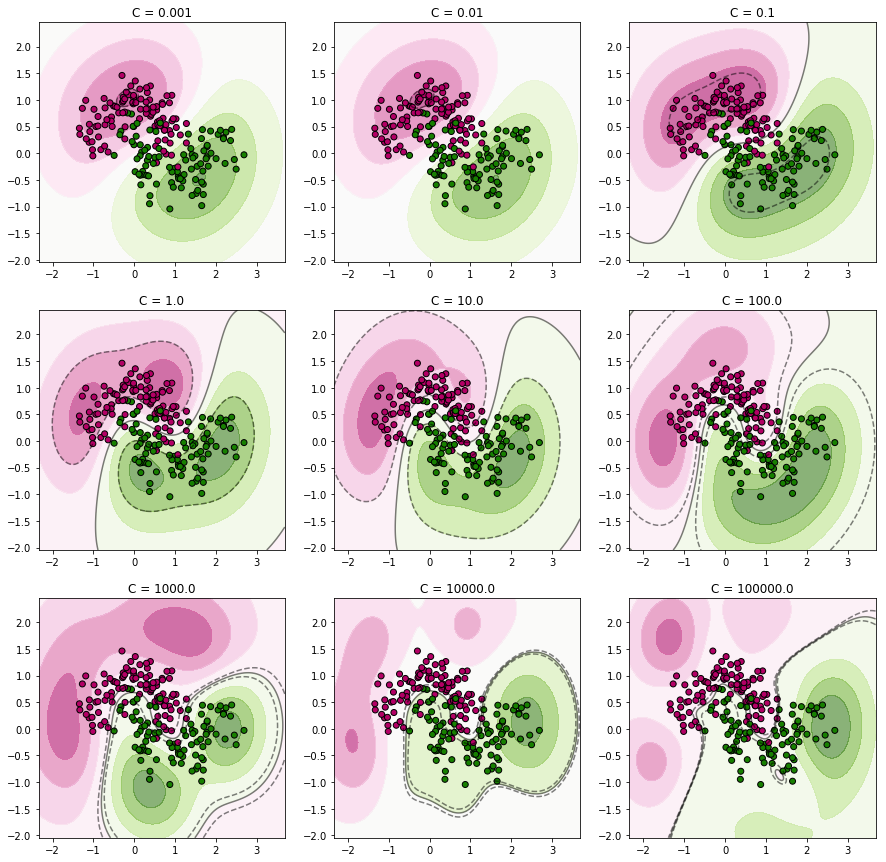

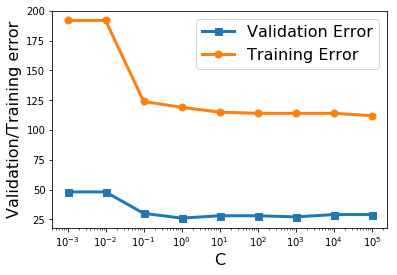

In [4]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()

from sklearn.svm import SVC

for C in C_values:
  models[C] = SVC(C=C, kernel='rbf', gamma='scale') # design the model
  models[C].fit(X_trn, y_trn) # training the designed model
  
visualize(models, 'C', X_trn, y_trn)

from sklearn.metrics import hinge_loss

# The hinge loss is used for "maximum-margin" classification for support vector machines (SVMs).
# The hinge_loss function gives average, so multiply by total no. of labels to get value of error

print("{:9s}\t{:9s}\t{:9s}".format('C', 'Training Error', 'Validation Error'))
for C in C_values:
    valErr[C] = len(y_val) * hinge_loss(y_val, models[C].predict(X_val), labels=None, sample_weight=None)
    trnErr[C] = len(y_trn) * hinge_loss(y_trn, models[C].predict(X_trn), labels=None, sample_weight=None)
    print("{:1f}\t{:1f}\t{:1f}".format(C, trnErr[C], valErr[C]))
    
plt.figure()
plt.xscale('log');
plt.plot(valErr.keys(), valErr.values(), marker = 's',linewidth=3, markersize=7)
plt.plot(trnErr.keys(), trnErr.values(), marker = 'o',linewidth=3, markersize=7)
plt.xlabel('C', fontsize=16)
plt.ylabel('Validation/Training error', fontsize=16)
#plt.xticks(list(valErr.keys()), fontsize=12)
plt.legend(['Validation Error', 'Training Error'], fontsize=16)

C_best = min(valErr.keys(), key=(lambda k: valErr[k]))
print('Minimum validation error: ',valErr[C_best],' at C_best = ',C_best)
print("As C increases the error decreases significantly till C=1, after which there is not much change.")
print("As C increases the complexity of the classifier increases and the margin of separation of support vectors decreases.")

model_best = SVC(C=C_best, kernel='rbf', gamma='scale')
accuracy = model_best.fit(X_trn, y_trn).score(X_tst, y_tst) 
print("Accuracy of SVM model with C_best is: ",accuracy)


---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

𝛾        	Training Error	Validation Error
0.010000	127.000000	31.000000
0.100000	122.000000	29.000000
1.000000	115.000000	27.000000
10.000000	109.000000	27.000000
100.000000	102.000000	29.000000
1000.000000	101.000000	40.000000
Minimum validation error:  27.0  at 𝛾_best =  1.0
As 𝛾 increases the complexity of the classifier increases.
As 𝛾 increases the error tends to decrease significantly till 𝛾= 1.0  after which there is not much change.
Accuracy of SVM model with 𝛾_best is:  0.6666666666666666


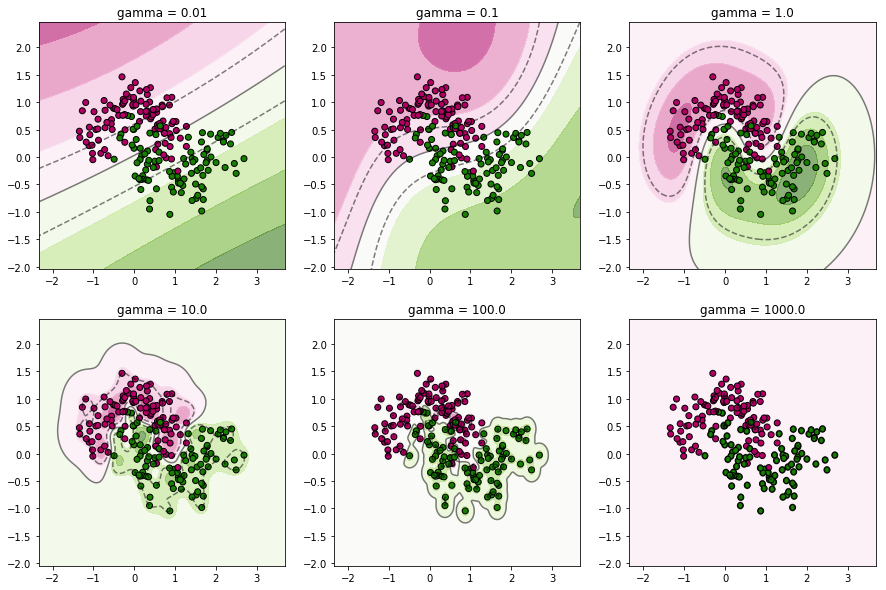

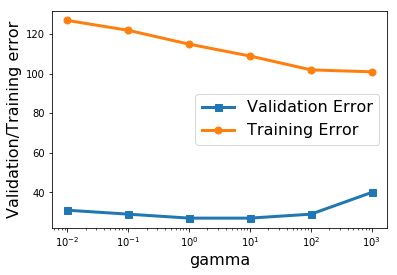

In [5]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

models1 = dict()
trnErr1 = dict()
valErr1 = dict()

for G in gamma_values:
  models1[G] = SVC(C=10, kernel='rbf', gamma=G) # design the model
  models1[G].fit(X_trn, y_trn) # training the designed model
  
visualize(models1, 'gamma', X_trn, y_trn)

print("{:9s}\t{:9s}\t{:9s}".format('𝛾', 'Training Error', 'Validation Error'))
for G in gamma_values:
    valErr1[G] = len(y_val) * hinge_loss(y_val, models1[G].predict(X_val), labels=None, sample_weight=None)
    trnErr1[G] = len(y_trn) * hinge_loss(y_trn, models1[G].predict(X_trn), labels=None, sample_weight=None)
    print("{:1f}\t{:1f}\t{:1f}".format(G, trnErr1[G], valErr1[G]))

plt.figure()
plt.xscale('log');
plt.plot(valErr1.keys(), valErr1.values(), marker = 's',linewidth=3, markersize=7)
plt.plot(trnErr1.keys(), trnErr1.values(), marker = 'o',linewidth=3, markersize=7)
plt.xlabel('gamma', fontsize=16)
plt.ylabel('Validation/Training error', fontsize=16)
#plt.xticks(list(valErr1.keys()), fontsize=12)
plt.legend(['Validation Error', 'Training Error'], fontsize=16)

gamma_best = min(valErr1.keys(), key=(lambda k: valErr1[k]))
print('Minimum validation error: ',valErr1[gamma_best],' at 𝛾_best = ',gamma_best)
print("As 𝛾 increases the complexity of the classifier increases.")
print('As 𝛾 increases the error tends to decrease significantly till 𝛾=',gamma_best,' after which there is not much change.')

model_best1 = SVC(C=10, kernel='rbf', gamma=gamma_best)
accuracy1 = model_best1.fit(X_trn, y_trn).score(X_tst, y_tst) 
print('Accuracy of SVM model with 𝛾_best is: ',accuracy1)

---
# 2. <font color='#cb4154'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [6]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
X_wdbc_trn = np.loadtxt('wdbc_trn.csv', delimiter=',', usecols=(np.arange(1,31)))
y_wdbc_trn = np.loadtxt('wdbc_trn.csv', delimiter=',', usecols=(0))
print(X_wdbc_trn.shape)
print(y_wdbc_trn.shape)
X_wdbc_val = np.loadtxt('wdbc_val.csv', delimiter=',', usecols=(np.arange(1,31)))
y_wdbc_val = np.loadtxt('wdbc_val.csv', delimiter=',', usecols=(0))
print(X_wdbc_val.shape)
print(y_wdbc_val.shape)
X_wdbc_tst = np.loadtxt('wdbc_tst.csv', delimiter=',', usecols=(np.arange(1,31)))
y_wdbc_tst = np.loadtxt('wdbc_tst.csv', delimiter=',', usecols=(0))
print(X_wdbc_tst.shape)
print(y_wdbc_tst.shape)

(339, 30)
(339,)
(115, 30)
(115,)
(115, 30)
(115,)


Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [7]:
C_r = np.arange(-2.0, 5.0, 1.0)
C_v = np.power(10.0, C_r)
G_r = np.arange(-3.0, 3.0, 1.0)
G_v = np.power(10.0, G_r)

models_wdbc = dict()
trnErr_wdbc = dict()
valErr_wdbc = dict()

print("{:9s}\t{:9s}\t{:9s}\t{:9s}".format('C', '𝛾', 'Training Error', 'Validation Error'))
for C_ in C_v:
    for G_ in G_v:
        models_wdbc[(C_, G_)] = SVC(C=C_, kernel='rbf', gamma=G_) # design the classifier (model)
        models_wdbc[(C_, G_)].fit(X_wdbc_trn, y_wdbc_trn) # train the classifier (model)
        trnErr_wdbc[(C_, G_)] = len(y_wdbc_trn) * hinge_loss(y_wdbc_trn, models_wdbc[(C_, G_)].predict(X_wdbc_trn), labels=None, sample_weight=None)
        valErr_wdbc[(C_, G_)] = len(y_wdbc_val) * hinge_loss(y_wdbc_val, models_wdbc[(C_, G_)].predict(X_wdbc_val), labels=None, sample_weight=None)
        print("{:1f}\t{:1f}\t{:1f}\t{:1f}".format(C_, G_, trnErr_wdbc[(C_, G_)], valErr_wdbc[(C_, G_)]))
        
best = min(valErr_wdbc.keys(), key=(lambda k: valErr_wdbc[k]))
print('Minimum validation error:',valErr_wdbc[best],' at C =',best[0],' 𝛾 =',best[1], ' (best model)')

model_wdbc_best = SVC(C=best[0], kernel='rbf', gamma=best[1])
accuracy_wdbc = model_wdbc_best.fit(X_wdbc_trn, y_wdbc_trn).score(X_wdbc_tst, y_wdbc_tst) 
print('Accuracy of the best SVM model is: ',accuracy_wdbc)
        

C        	𝛾        	Training Error	Validation Error
0.010000	0.001000	252.000000	86.000000
0.010000	0.010000	252.000000	86.000000
0.010000	0.100000	252.000000	86.000000
0.010000	1.000000	252.000000	86.000000
0.010000	10.000000	252.000000	86.000000
0.010000	100.000000	252.000000	86.000000
0.100000	0.001000	208.000000	70.000000
0.100000	0.010000	34.000000	16.000000
0.100000	0.100000	24.000000	18.000000
0.100000	1.000000	252.000000	86.000000
0.100000	10.000000	252.000000	86.000000
0.100000	100.000000	252.000000	86.000000
1.000000	0.001000	32.000000	14.000000
1.000000	0.010000	20.000000	14.000000
1.000000	0.100000	8.000000	10.000000
1.000000	1.000000	0.000000	86.000000
1.000000	10.000000	0.000000	86.000000
1.000000	100.000000	0.000000	86.000000
10.000000	0.001000	18.000000	8.000000
10.000000	0.010000	8.000000	10.000000
10.000000	0.100000	0.000000	8.000000
10.000000	1.000000	0.000000	86.000000
10.000000	10.000000	0.000000	86.000000
10.000000	100.000000	0.000000	86.000000
100.000000	0.001000

---
# 3. <font color='#cb4154'> **Decision Trees**</font>, 25 points. 

### a. (12 points)  Interpreting a Decision Tree (Pencil and Paper)

Consider the decision boundary in the figure below and draw the equivalent decision tree. Red circles are Class +1 and blue squares, Class -1.

![If the figure is not visible, make sure you have placed the file HW02_DecisionTrees_3a.png in the same directory as this Python notebook.](./HW02_DecisionTrees_3a.png)

<img src="./ml_assignment2_part3a.png" alt="decision_tree" width="350"/>

---

### b. (13 points)  Visualizing a Decision Tree (Pencil and Paper)

Consider the decision tree in the figure below and draw the equivalent decision boundary. Make sure to label each decision region with the corresponding leaf node from the decision tree.

![If the figure is not visible, make sure you have placed the file HW02_DecisionTrees_3b.png in the same directory as this Python notebook.](./HW02_DecisionTrees_3b.png)

<img src="./ml_assignment2_part3b.png" alt="decision_boundary" width="350"/>

---